In [13]:
%matplotlib inline
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np
import random
import matplotlib.pyplot as plt

In [14]:
class FunctionApproximation(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv('train.csv')
            self.raw_val = pd.read_csv('test.csv')
            
    def preprocess(self):
        # Remove the ID and label columns
        label = 'y'
        features = pd.concat(
            (self.raw_train.drop(columns=['id', label]),
            self.raw_val.drop(columns=['id'])))
        
        numeric_features = features.dtypes[features.dtypes!='object'].index
        
        # Replace NAN numerical features by 0
        features[numeric_features] = features[numeric_features].fillna(0)

        # Save preprocessed features
        self.train = features[:self.raw_train.shape[0]].copy()
        self.train[label] = self.raw_train[label]
        self.val = features[self.raw_train.shape[0]:].copy()

In [15]:
data = FunctionApproximation(batch_size=256)
print(data.raw_train.info())
print(data.raw_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8000 non-null   float64
 1   x1      8000 non-null   float64
 2   x2      8000 non-null   float64
 3   y       8000 non-null   float64
dtypes: float64(4)
memory usage: 250.1 KB
None
                id           x1           x2            y
count  8000.000000  8000.000000  8000.000000  8000.000000
mean   4000.937500    -0.003569    -0.002373     1.038756
std    2309.643125     0.582923     0.582456     0.381033
min       1.000000    -1.000000    -1.000000     0.026200
25%    2000.000000    -0.515000    -0.515000     0.709750
50%    4000.000000    -0.010100    -0.010100     1.070000
75%    6000.000000     0.495000     0.495000     1.360000
max    8000.000000     1.000000     1.000000     1.960000


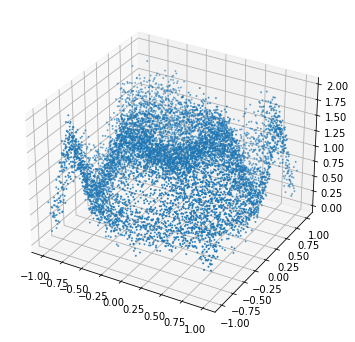

In [16]:
dataG = pd.read_csv('train.csv')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data.raw_train['x1'], data.raw_train['x2'], data.raw_train['y'], s = 1)
plt.show()
fig.savefig('train_plot.jpg', dpi = 500)

In [17]:
data.preprocess()
print(data.train.info())
print(data.train.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      8000 non-null   float64
 1   x2      8000 non-null   float64
 2   y       8000 non-null   float64
dtypes: float64(3)
memory usage: 250.0 KB
None
                x1           x2            y
count  8000.000000  8000.000000  8000.000000
mean     -0.003569    -0.002373     1.038756
std       0.582923     0.582456     0.381033
min      -1.000000    -1.000000     0.026200
25%      -0.515000    -0.515000     0.709750
50%      -0.010100    -0.010100     1.070000
75%       0.495000     0.495000     1.360000
max       1.000000     1.000000     1.960000


C:\Users\annie\AppData\Local\Temp\ipykernel_28376\423734491.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


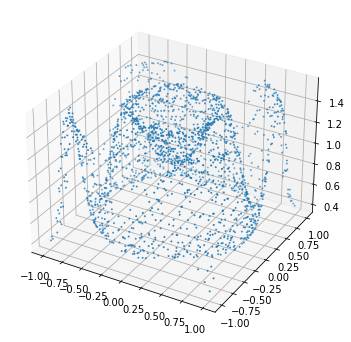

In [18]:
dataV = pd.read_csv('test.csv')
dataS = pd.read_csv('submission.csv')
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.scatter(dataV['x1'], dataV['x2'], dataS['y'], s = 1)
plt.show()

# 儲存子圖表
fig.savefig('submission_plot.jpg', dpi = 500)